In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow    
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

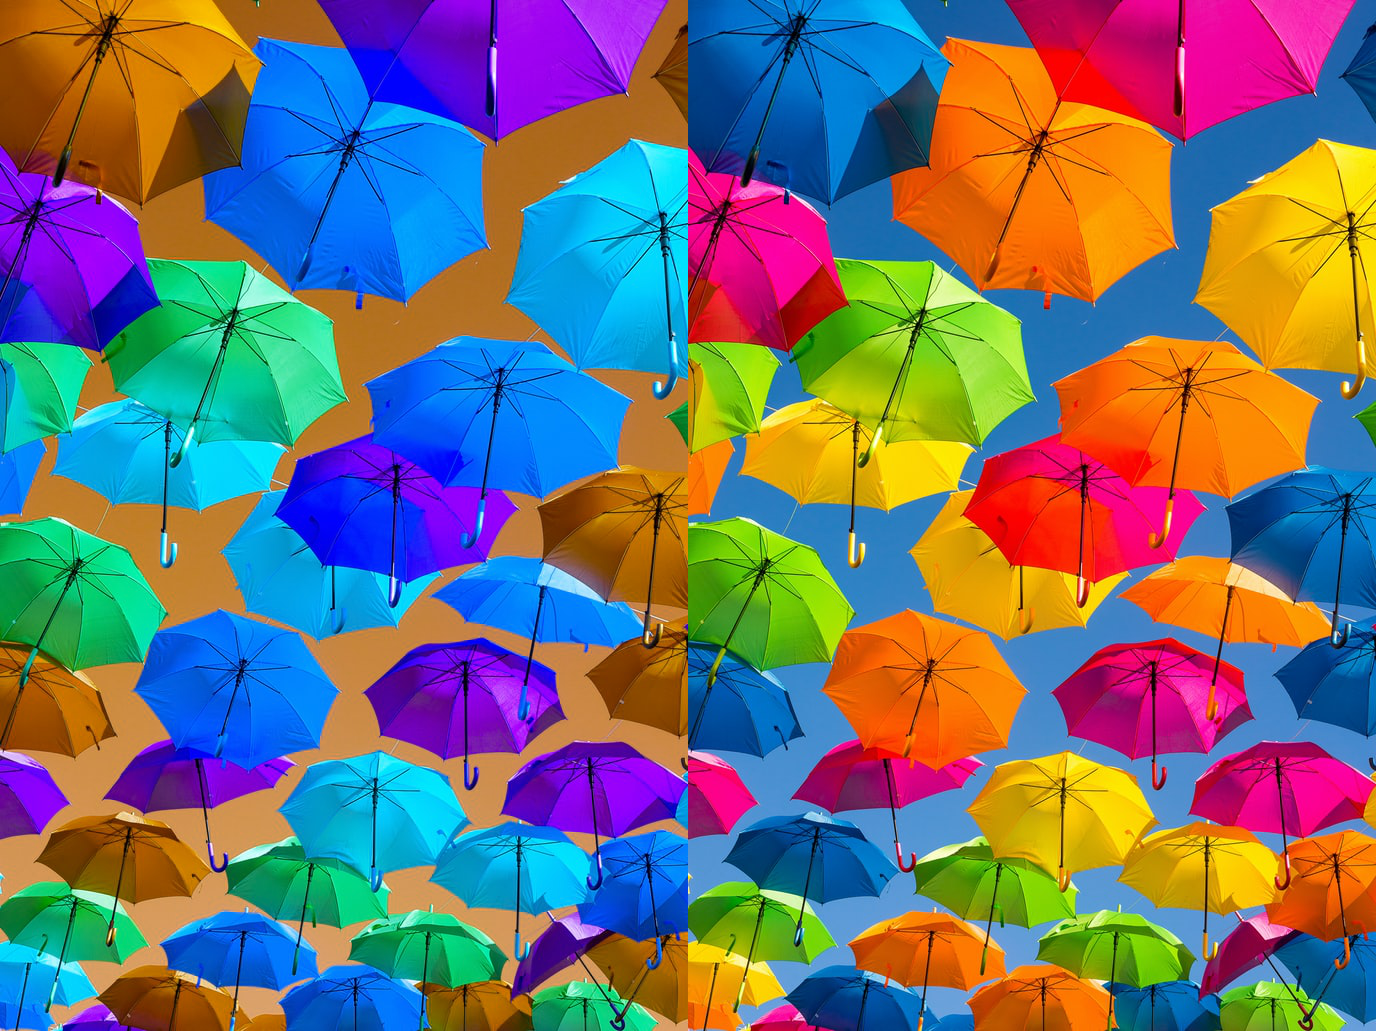

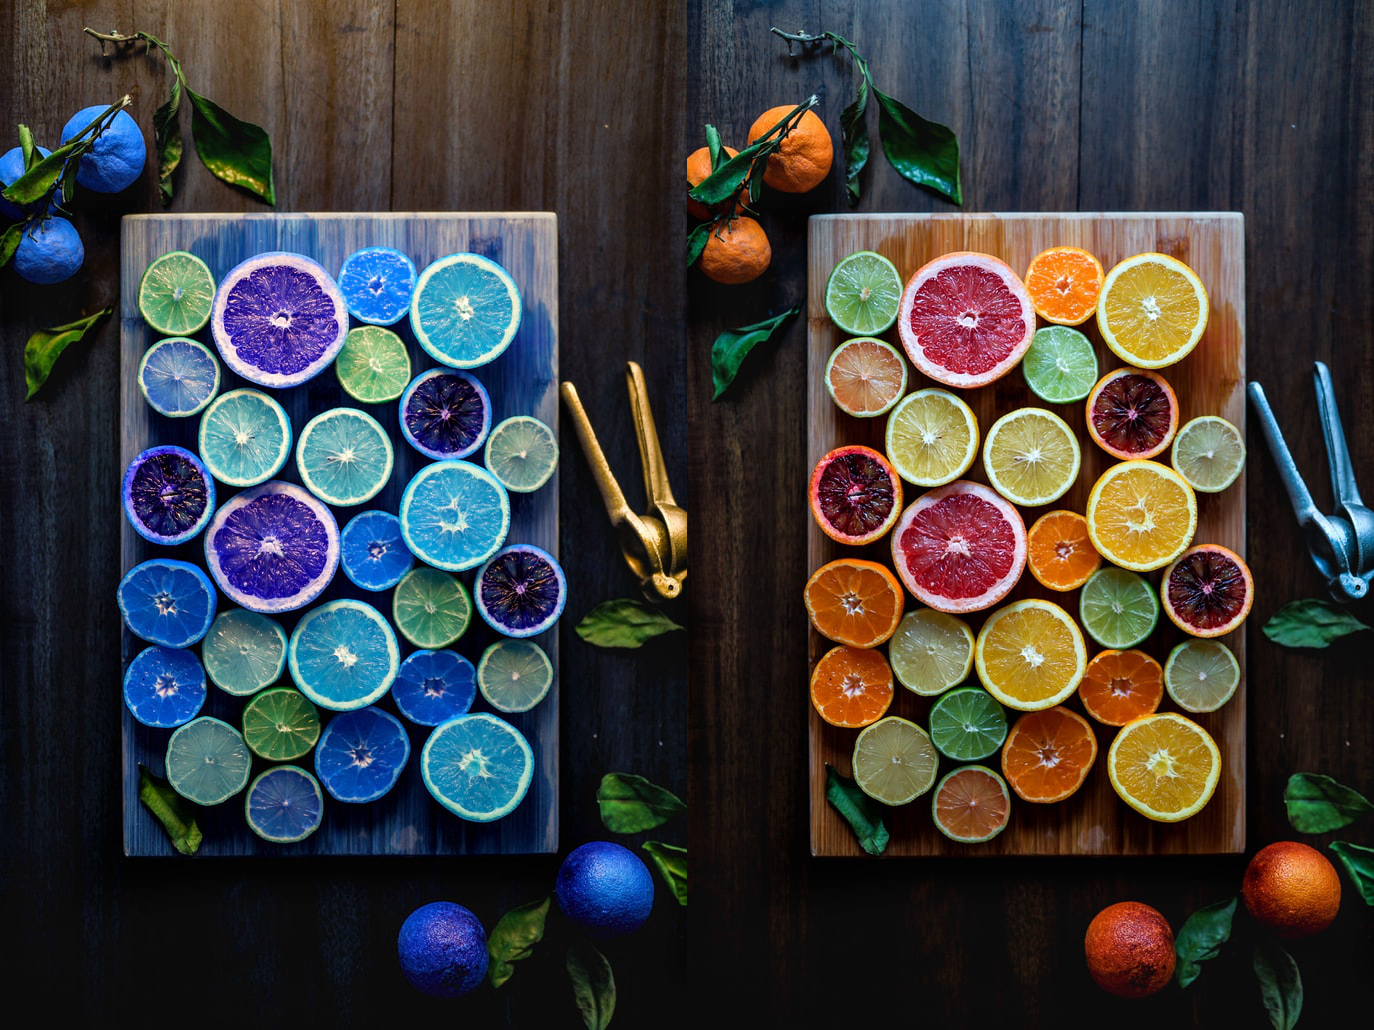

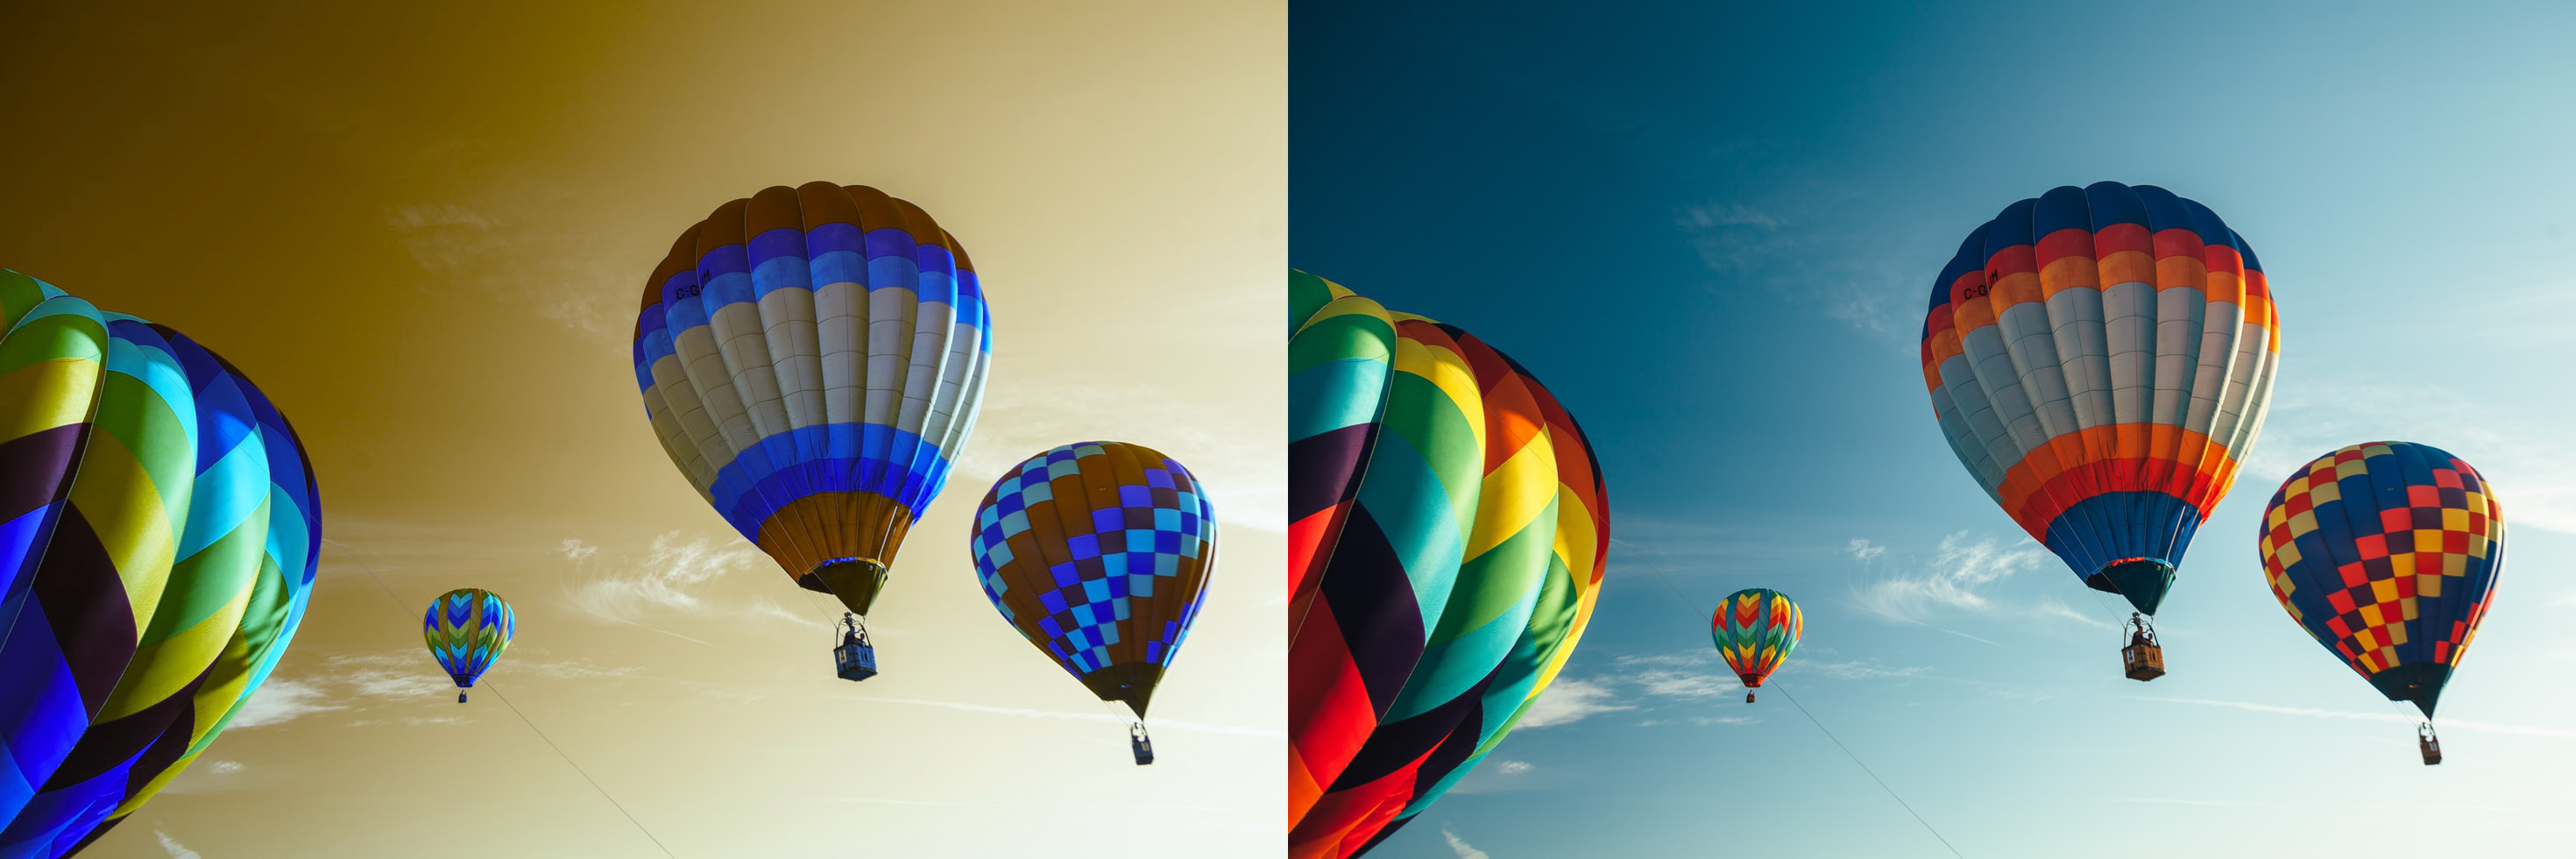

In [5]:
urls = ["https://images.unsplash.com/photo-1532135468830-e51699205b70?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=688&q=80",
"https://images.unsplash.com/photo-1511688878353-3a2f5be94cd7?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=687&q=80",
"https://images.unsplash.com/photo-1569041032620-2d0ee0b7b673?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1470&q=80"]
for url in urls:
  image = io.imread(url)
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat((image, image_2))
  cv2_imshow(final_frame)
  print('\n') 


In [6]:
print(image.dtype)
print(image.shape[0])
print(image.shape[1])
print(image.shape[2])

uint8
980
1470
3


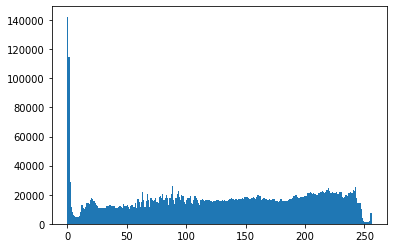

In [7]:
plt.hist(image.ravel(),bins = 256, range = [0,256])
plt.show()

Histogram Of R,G,B Channels

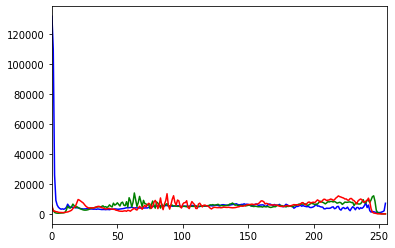

In [9]:
color = ('b','g','r')
for i, col in enumerate(color):
  histr = cv.calcHist([image],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
plt.show()

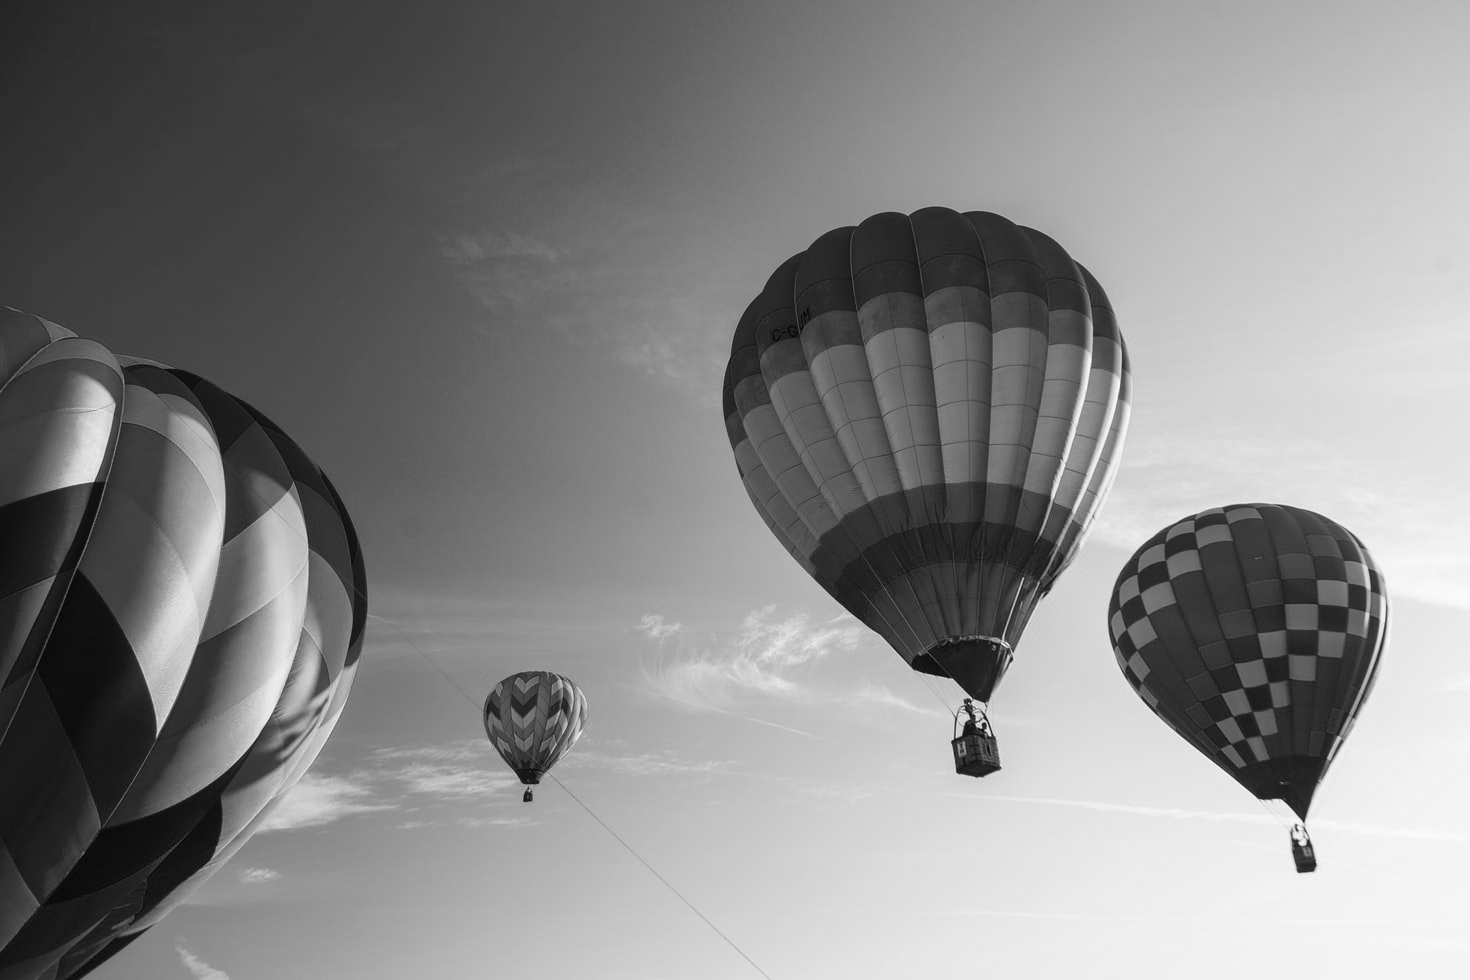

In [13]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

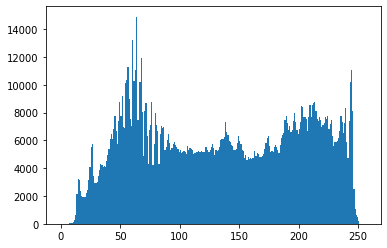

In [14]:
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

GrayScale Transformation - conducting mathematical transformations of the grayscale image.
 inverse operation of the grayscale image
 

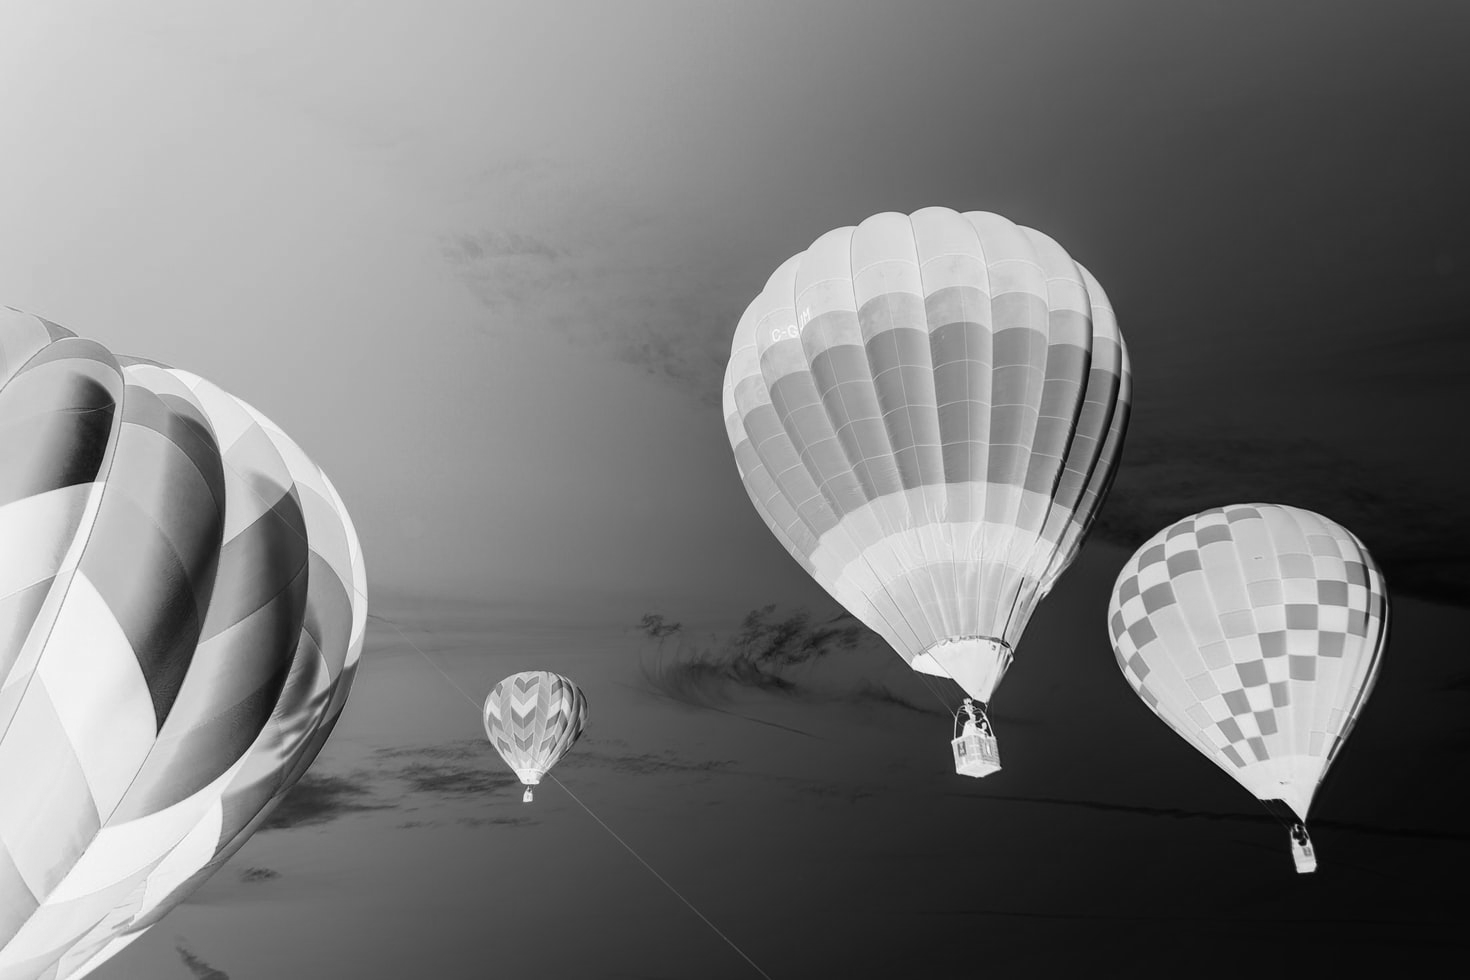

In [15]:
im2 = 255 - gray_image
cv2_imshow(im2)

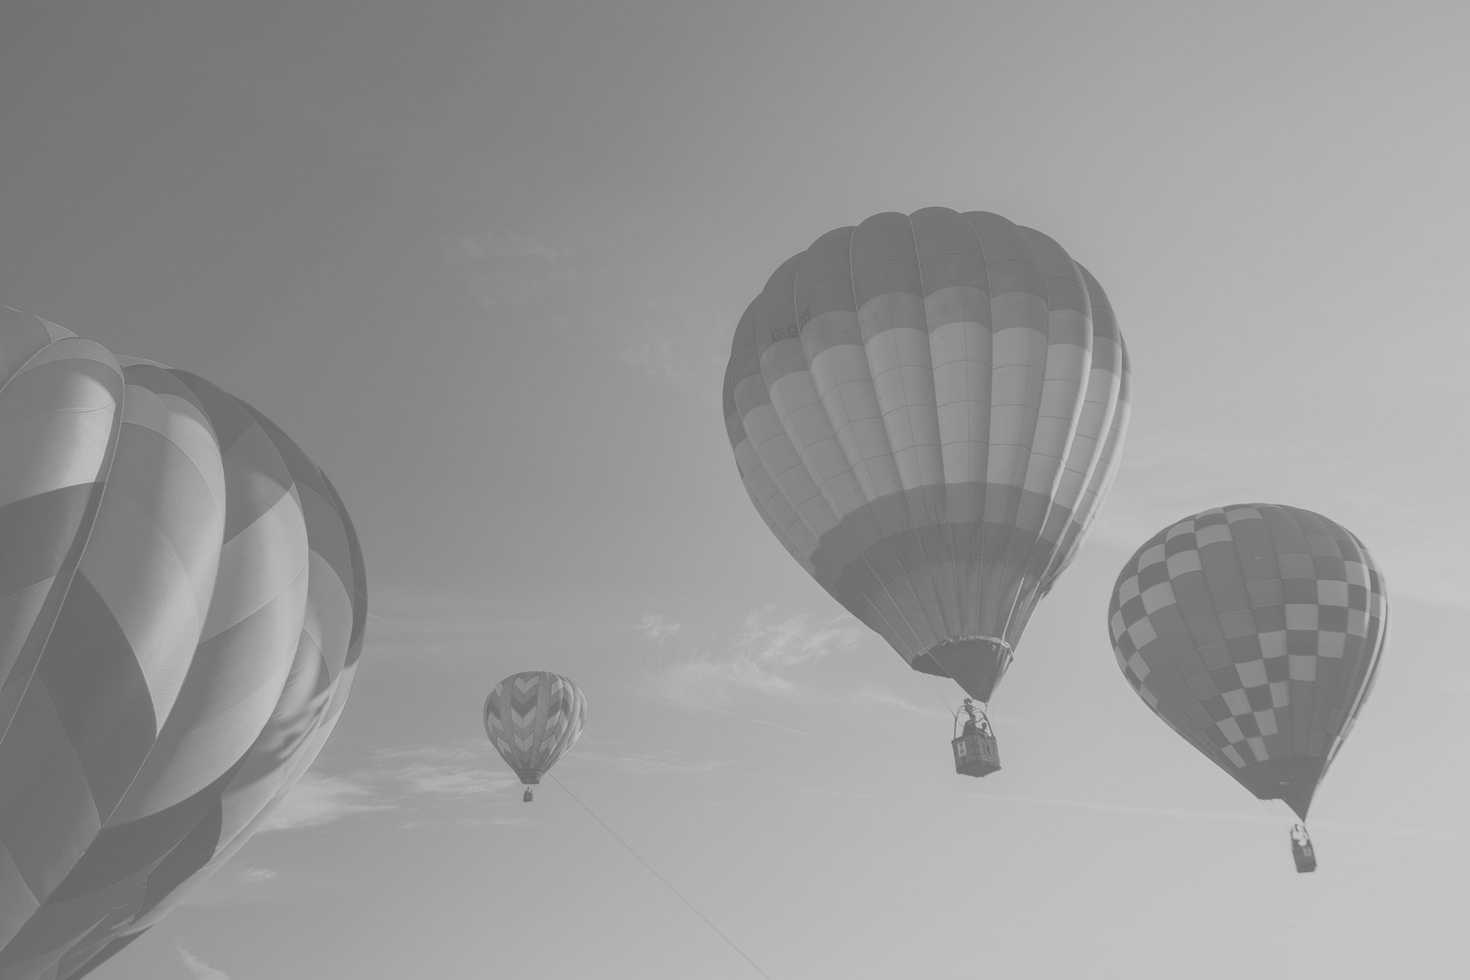

In [16]:
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

Fourier Transform Of grayscale Images

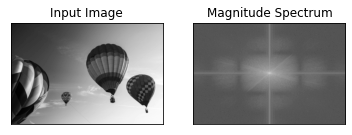

In [17]:
imBlur = cv.blur(gray_image,(5,5))
f = np.fft.fft2(imBlur)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Finding edges by high pass filtering

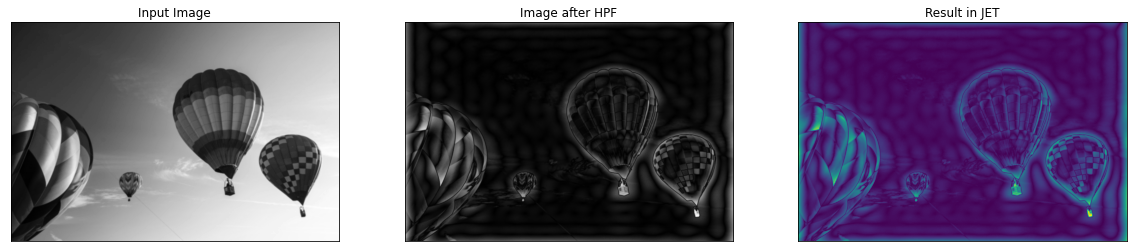

In [18]:
rows, cols = imBlur.shape
crow, ccol = round(rows/2) , round(cols/2)
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()